# Лабораторна №6
## Гусак Владислав

Створюємо модель і тестуємо її

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [127]:
theta=0.1/4

In [128]:
def model(P, t, C, W):
    Pt=P*np.e**(-t/(W*C))
    return Pt
def t_model(P, t, C, W):
    Pt=-(P*np.e**(-t/(W*C)))/C*W
    return Pt

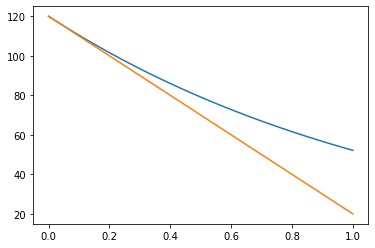

In [129]:
plt.figure()
t=np.linspace(0, 1, 100)
x=model(120, t, 1.2, 1)
plt.plot(t, x)
tan=model(120, 0, 1.2, 1)+t_model(120, 0, 1.2, 1)*t
plt.plot(t, tan)

## Завдання №1

In [134]:
def model(P, t, C, W):
    Pt=P*np.e**(-t/(W*C))
    return Pt
def t_model(P, t, C, W):
    Pt=-(P*np.e**(-t/(W*C)))/C*W
    return Pt

In [135]:
P1=120
W=sorted([1+theta, 0.8+theta, 1.2+theta])
C=1.2-theta
t=np.linspace(0, 0.5, 100)
W


[0.8250000000000001, 1.025, 1.2249999999999999]

Text(0.5, 0, 't')

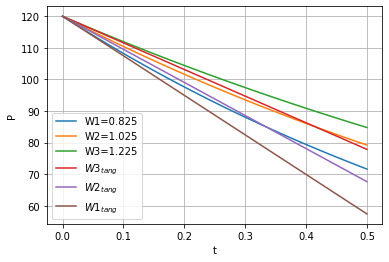

In [136]:
fig, ax=plt.subplots()
ax.grid()
for w in W:
    x=model(P1,t, C, w)
    plt.plot(t, x)
derv=[]
for w in W:
    tan=model(P1,0, C, w)+t_model(P1, 0, C, w)*t
    plt.plot(t, tan)
    d=t_model(P1, 0, C, w)
    derv.append(d)
plt.legend(['W1={:.3f}'.format(W[0]), 'W2={:.3f}'.format(W[1]), 'W3={:.3f}'.format(W[2]),
            '$W3_{tang}$', '$W2_{tang}$', '$W1_{tang}$'])
plt.ylabel('P')
plt.xlabel('t')

$P_2=71.5 - W=0.825$;
$P_2=79.1 - W=1.025$;
$P_2=84.7 - W=1.225$;
Бачимо що при збільшенні гідродинамічного опору судин кінцеве значення тиску зростаяє

In [137]:
derv

[-84.25531914893618, -104.68085106382978, -125.10638297872339]

Як можимо бачити що похідна падає разом з зростанням гідородинамічного опору судин

## Завдання №2

In [138]:
P1=120
W=1+theta
C=sorted([1.2-theta, 1.5-theta, 0.9-theta])
t=np.linspace(0, 0.5, 100)
C

[0.875, 1.175, 1.475]

Text(0.5, 0, 't')

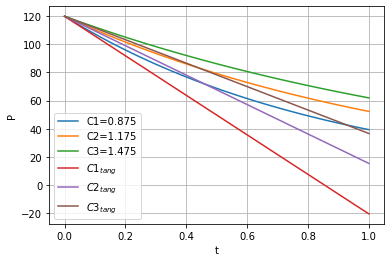

In [147]:
fig, ax=plt.subplots()
ax.grid()
for c in C:
    x=model(P1,t, c, W)
    plt.plot(t, x)
derv=[]
for c in C:
    tan=model(P1,0, c, W)+t_model(P1, 0, c, W)*t
    plt.plot(t, tan)
    d=t_model(P1, 0, c, W)
    derv.append(d)
plt.legend(['C1={:.3f}'.format(C[0]), 'C2={:.3f}'.format(C[1]), 'C3={:.3f}'.format(C[2]),
            '$C1_{tang}$', '$C2_{tang}$', '$C3_{tang}$'])
plt.ylabel('P')
plt.xlabel('t')

$P_2=68.7 - С=0.875$;
$P_2=79 - С=1.175$;
$P_2=86.1 - С=1.475$;
Бачимо що при збільшенні еластичності судин кінцеве значення тиску зростає

In [140]:
derv

[-140.57142857142856, -104.68085106382978, -83.38983050847456]

Як можимо бачити що похідна зростає разом з еластичністю судин

## Завдання №3

In [141]:
def model_2(P, t, W, C, Qmax, Pk, t0):
    a=Qmax/(t0**2)
    b=(2*Qmax)/t0
    Qc=-((a*t)**2)+b*t
    return Qc/C+Pk/(W*C)-P/(W*C)

Text(0.5, 1.0, 'Залежніть тиску крові в аорті від часу')

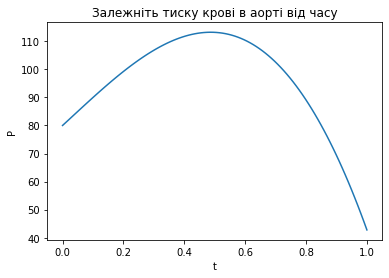

In [142]:
t=np.linspace(0,1,100)
x=odeint(model_2, 80, t, (1+theta, 1.2-theta, 200, 200, 2.8))
plt.plot(t,x)
plt.ylabel('P')
plt.xlabel('t')
plt.title('Залежніть тиску крові в аорті від часу')

# Висновок
Виконавши лабораторну роботу, проаналізували модель Франка пілся закриття аортального клапану при різних параметрах системи. З побудованих графіків визначили швидкість зменшення тиску в початковий момент часу.

Також проаназували зміну тиску крові в аорті під час 1 і 2 фаз. Проте використана модель показує лише один серцевий цикл, і не виходить на натупний цикл, що говорить про її обмеженість і неможливість використання для повноціного моделювання роботи серця.